# Applied Mechanisms and Big Data
### Assignment 1: wifi
##### Ysbrand Galama, 10262067
##### Koen Keune, 10003527



## 0.1

In [10]:
%pylab inline
from matplotlib.patches import Ellipse
from scipy.optimize import minimize as spmin
from scipy.stats import chi2 as pchi2

random.seed(1)
pylab.rcParams['figure.figsize'] = (10, 6)

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


## 0.2

$ P_r = P_t + 20 \times ^{10}\log \left( \frac{c}{4\pi f r} \right) $

### a

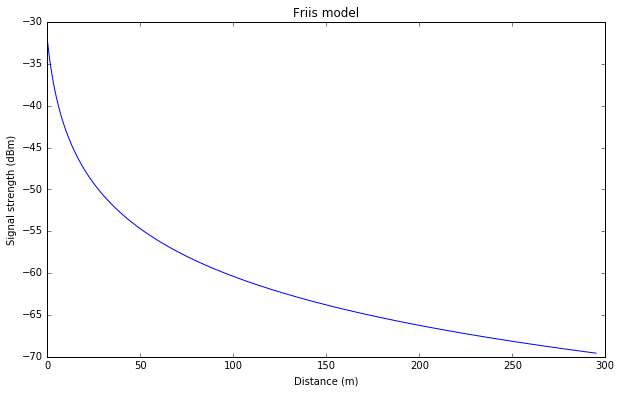

In [3]:
Pt,c,f = 0, 299792458, 2.4e9

r = arange(0.4,30,0.1)

Pr = Pt + 20 * log10( c / ( 4*pi*f*r) )

plot(Pr)
title('Friis model')
ylabel('Signal strength (dBm)')
xlabel('Distance (m)')

As can be seen from the plot the signal strength changes more at a lower distance between the device and the router than at a higher distance. Which makes the router more sensitive for devices that are closer in distance. 

### b

\begin{align}
P_r &= P_t + 20 \times ^{10}\log \left( \frac{c}{4\pi f r} \right) \\
\frac{P_r - P_t} { 20} &= ^{10}\log \left( \frac{c}{4\pi f r} \right) \\
10 ^ { \frac{P_r - P_t} { 20} } &= \frac{c}{4\pi f r} \\
10 ^ { \frac{P_r - P_t} { 20} } \frac{4\pi f}{c} &= \frac{1}{r} \\
r &= \frac{c}{4\pi f} 10^{ (P_t - P_r) / -20}
\end{align}

### c

In [4]:
def friis_i(Pr,Pt=0):
    return c/(4*pi*f) * 10**((Pt - Pr)/-20)

print('Delta friis of -30 and -31:', friis_i(-30) - friis_i(-31) )

print('Delta friis of -60 and -61:', friis_i(-60) - friis_i(-61) )

Delta friis of -30 and -31: 3.4184176042559257e-05
Delta friis of -60 and -61: 1.0809985623064794e-06


### d
As seen from the results of (c), the more negative the signal strength, the smaller the uncertainty becomes. This is intuitively correct, as the result of $P_t-P_r$ becomes larger, and ten to the power of minus that number becomes a smaller number. It can also be seen from the plot of (a), as the slope gets flatter, the bigger the distance becomes.

## 0.3
### e

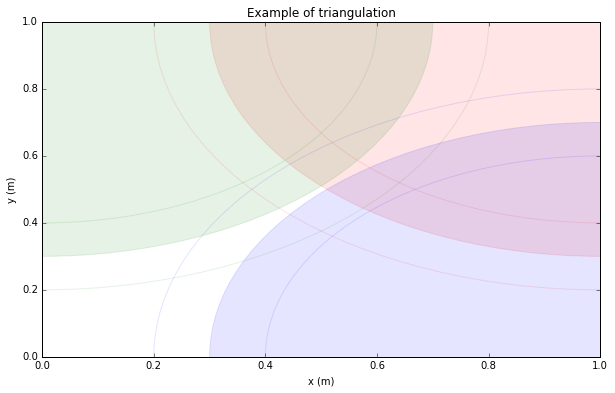

In [8]:
# 3 points with ( (x,y), distance, uncertainty, colour)
ps = [ ( (1,1), 0.7, 0.1, 'r'), ( (1,0), 0.7, 0.1, 'b'), ( (0,1), 0.7, 0.1, 'g') ]

ax = gcf().gca()
for p in ps:
    ax.add_artist(Circle( p[0], p[1], color=p[3], alpha=0.1))
    ax.add_artist(Circle( p[0], p[1]-p[2], color=p[3], alpha=0.1, fill=False))
    ax.add_artist(Circle( p[0], p[1]+p[2], color=p[3], alpha=0.1, fill=False))
title('Example of triangulation')
ylabel('y (m)')
xlabel('x (m)')

The plot illustrates an example of 3 routers at points (1.1), (1.0), (0.1), the radius shows the imaginary signal strength of a device, and it has multiple radiuses to illustrate an uncertainty around the signal strength. As seen in this plot, the circles don't actually overlap at a singular point, however, the overlap will be somewhere inside the margins of the uncertainties

### f

\begin{align}
P_r^i(x,y) &= P_t + 20 \times ^{10}\log \left( \frac{c}{4\pi f r} \right) \\
&= P_t + 20 \times ^{10}\log \left( \frac{c}{4\pi f} \right) + 20 \times ^{10}\log \frac1r \\
&= P_t + 20 \times ^{10}\log \left( \frac{c}{4\pi f} \right) - 20 \times ^{10}\log r \\
&= P_t + 20 \times ^{10}\log \left( \frac{c}{4\pi f} \right) - 20 \times ^{10}\log \sqrt{ (x-x_i)^2 + (y-y_i)^2 + Z^2) } \\
&= P_t + 20 \times ^{10}\log \left( \frac{c}{4\pi f} \right) - 10 \times ^{10}\log \left( (x-x_i)^2 + (y-y_i)^2 + Z^2) \right) 
\end{align}

### g

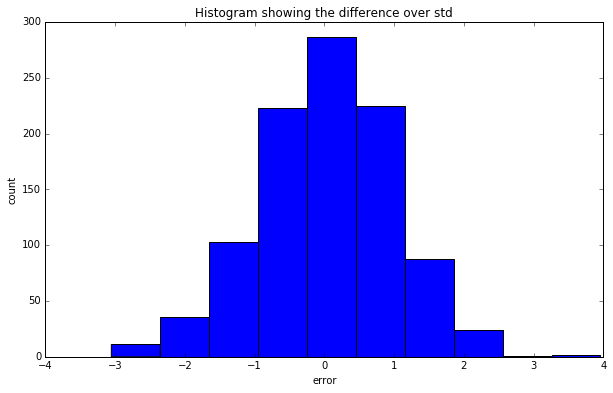

In [13]:
Pt,c,f = 0, 299792458, 2.4e9
Z = 2
x,y = 20,0
xi,yi = 0,0
Pt = 0

packets = Pt+20*log10(c/(4*pi*f)) - 10 * log10( (x-xi)**2 + (y-yi)**2 + Z**2) + random.normal(0,1,1000)
expect = Pt+20*log10(c/(4*pi*f)) - 10 * log10( (x-xi)**2 + (y-yi)**2 + Z**2)

hist( (packets - expect) / 1 )
title('Histogram showing the difference over std')
ylabel('count')
xlabel('error')

The shown distribution has a mean of ~0 and a std of ~1

### h

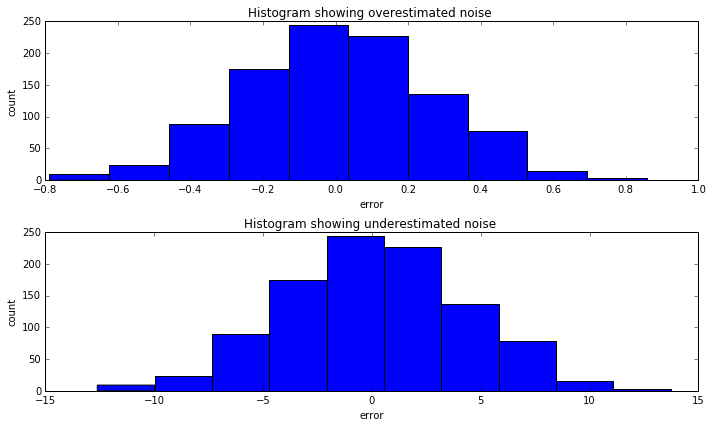

In [14]:
Pt,c,f = 0, 299792458, 2.4e9
Z = 2
x,y = 20,0
xi,yi = 0,0
Pt = 0


packets = Pt+20*log10(c/(4*pi*f)) - 10 * log10( (x-xi)**2 + (y-yi)**2 + Z**2) + random.normal(0,1,1000)
expect = Pt+20*log10(c/(4*pi*f)) - 10 * log10( (x-xi)**2 + (y-yi)**2 + Z**2)

subplot(2,1,1),
hist( (packets - expect) / 4 )
title("Histogram showing overestimated noise ")
xlabel('error')
ylabel('count')
subplot(2,1,2),hist( (packets - expect) / .25 )
title("Histogram showing underestimated noise ")
xlabel('error')
ylabel('count')
tight_layout()

Underestimating the noise increases the std of the pull distribution.
Overestimating on the contrary reduces the std. Mean stays the same in both occations. (notice the different x-values)

### i

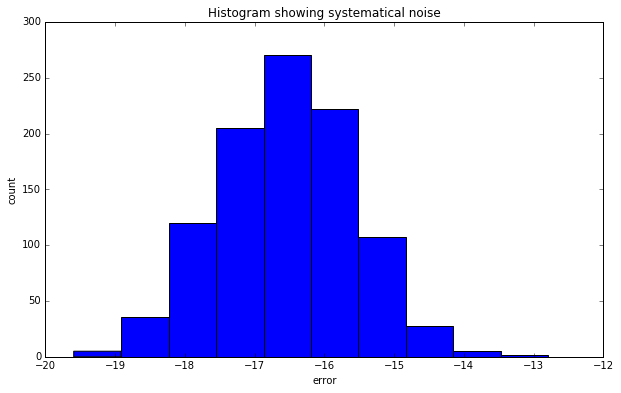

In [15]:
Pt,c,f = 0, 299792458, 2.4e9
Z = 2
x,y = 20,0
xi,yi = 0,0
Pt = 0


packets = Pt+25*log10(c/(4*pi*f)) - 12.5 * log10( (x-xi)**2 + (y-yi)**2 + Z**2) + random.normal(0,1,1000)
expect = Pt+20*log10(c/(4*pi*f)) - 10 * log10( (x-xi)**2 + (y-yi)**2 + Z**2)

hist( (packets - expect) / 1 )
title('Histogram showing systematical noise')
xlabel('error')
ylabel('count')


In this case the mean of the error is no longer zero, while the std remains ~1. (again, notice the x-values)

### j
Seen from these experiments, a pull distribution should have a mean of 0 and a std of your estimated std. Once this is the case, the model is correctly built for the data.

## 0.3

### k

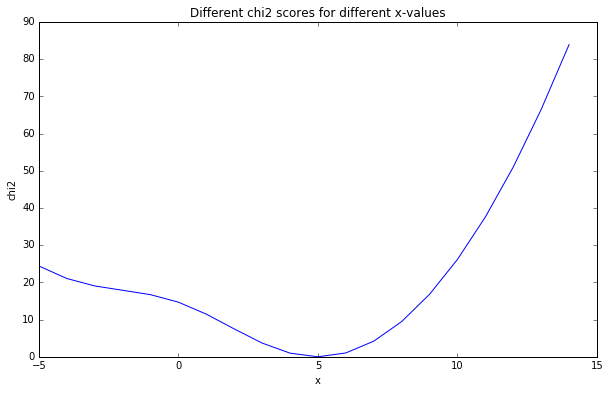

In [16]:
Pt,c,f = 0, 299792458, 2.4e9
xi, yi = array([[0, 0, 20, 20]]).T, array([[0, 20, 20, 0]]).T
sig = 1
Z = 3-1
x,y = 5,5

Si = Pt + 20 * log10(c/(4*pi*f) ) - 10 * log10( (x - xi)**2 + (y - yi)**2 + Z**2 )

def chi2(x,y):
    Pri = Pt + 20 * log10(c/(4*pi*f) ) - 10 * log10( (x - xi)**2 + (y - yi)**2 + Z**2 )
    return sum( (Si - Pri)**2/sig**2, axis=0 )

xrange = atleast_2d(arange(-5,15))
plot(xrange[0], chi2(xrange,5) )
title('Different chi2 scores for different x-values')
xlabel('x')
ylabel('chi2')

### l

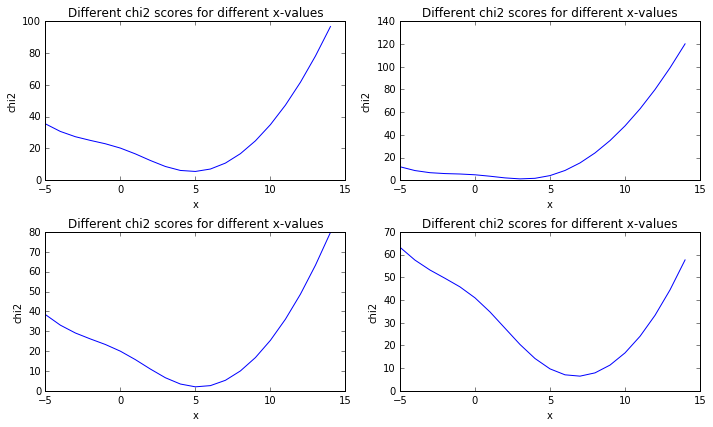

In [17]:
Pt,c,f = 0, 299792458, 2.4e9
xi, yi = array([[0, 0, 20, 20]]).T, array([[0, 20, 20, 0]]).T
sig = 1
Z = 3-1
x,y = 5,5

for i in range(1,5):
    subplot(2,2,i)
    Si = Pt + 20 * log10(c/(4*pi*f) ) - 10 * log10( (x - xi)**2 + (y - yi)**2 + Z**2 ) + random.normal(0,1,xi.shape )

    plot(xrange[0], chi2(xrange,5) )
    title('Different chi2 scores for different x-values')
    ylabel('chi2')
    xlabel('x')
tight_layout()

As seen from these four figures with different noise, the minimum is no longer neccesary on
the correct position. It fluctuates slightly around the expected x-value of 5.

### m

In [18]:
Pt,c,f = 0, 299792458, 2.4e9
xi, yi = array([[0, 0, 20, 20]]).T, array([[0, 20, 20, 0]]).T
sig = 1
Z = 3-1
x,y = 5,5


Si = Pt + 20 * log10(c/(4*pi*f) ) - 10 * log10( (x - xi)**2 + (y - yi)**2 + Z**2 ) + random.normal(0,1,xi.shape )

print( spmin( chi2, 0, 5 ) )

      fun: 0.5778920680007266
 hess_inv: array([[ 0.50242757]])
      jac: array([ -9.83476639e-07])
  message: 'Optimization terminated successfully.'
     nfev: 24
      nit: 4
     njev: 8
   status: 0
  success: True
        x: array([ 4.49288246])


### n

Mean estimated (x,y) coordinates: [ 4.9215609   4.84240342]
Mean minimum chi2 values: 1.89368597747


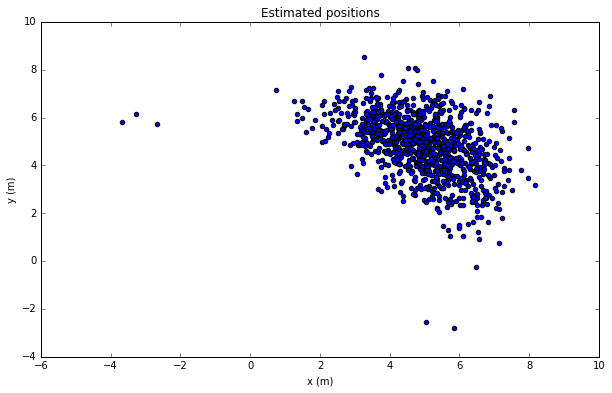

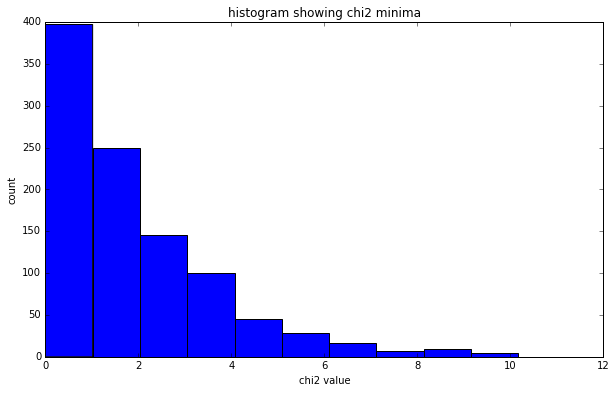

In [19]:
Pt,c,f = 0, 299792458, 2.4e9
xi, yi = array([[0, 0, 20, 20]]).T, array([[0, 20, 20, 0]]).T
sig = 1
Z = 3-1
x,y = 5,5

def chi2_p(x): 
    """make both parameters of chi2 in a single variable for minimising"""
    return chi2(x[0],x[1])

points = []
chi2mins = []
for i in range(0,1000):
    Si = Pt + 20 * log10(c/(4*pi*f) ) - 10 * log10( (x - xi)**2 + (y - yi)**2 + Z**2 ) + random.normal(0,1,xi.shape )
    ans = spmin( chi2_p, array([0, 0]) ) 
    points.append( ans.x )
    chi2mins.append( ans.fun )

coords = array(points) 
figure()
scatter(coords[:,0],coords[:,1])
title('Estimated positions')
xlabel('x (m)')
ylabel('y (m)')
figure()
hist(array(chi2mins))
title('histogram showing chi2 minima')
ylabel('count')
xlabel('chi2 value')
print('Mean estimated (x,y) coordinates:', mean(coords,axis=0))
print('Mean minimum chi2 values:', mean(array(chi2mins)))

### o

The plot of (n) shows a $\chi^2$ average of ~2, exactly the NDoF.

### p

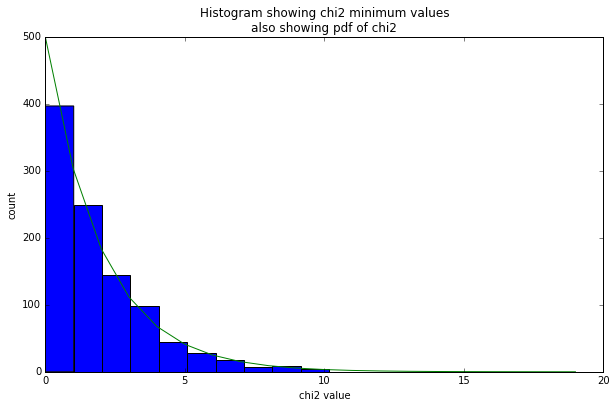

In [12]:
Pt,c,f = 0, 299792458, 2.4e9
xi, yi = array([[0, 0, 20, 20]]).T, array([[0, 20, 20, 0]]).T
sig = 1
Z = 3-1
x,y = 5,5

hist(array(chi2mins) )
plot( pchi2.pdf(range(0,20),2) * len(chi2mins), color='g' )
title('Histogram showing chi2 minimum values\nalso showing pdf of chi2')
xlabel('chi2 value')
ylabel('count')

As seen in the figure, the histogram of errors follows the pdf

### q

mean estimated (x,y) coordinates: [ 4.56257839  4.33343766]
mean chi2 value: 7.41264962491


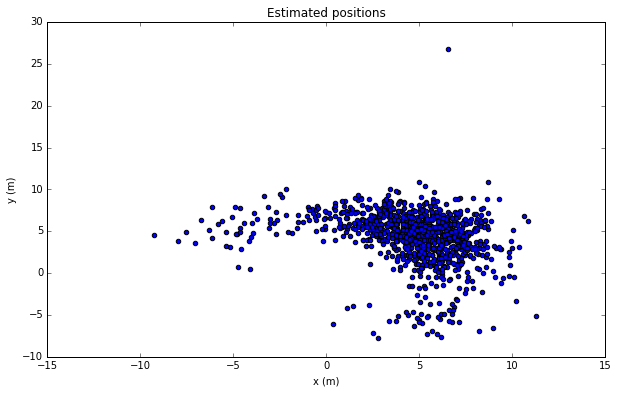

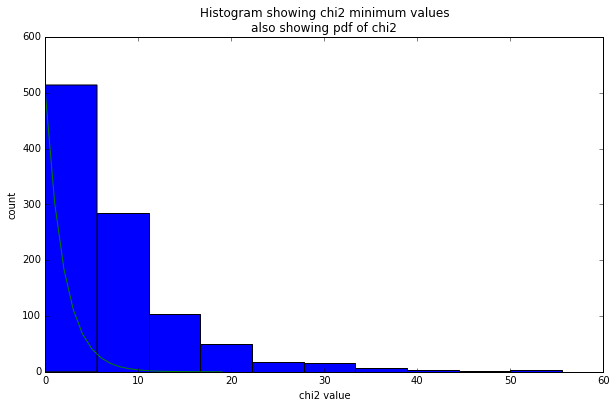

In [13]:
Pt,c,f = 0, 299792458, 2.4e9
xi, yi = array([[0, 0, 20, 20]]).T, array([[0, 20, 20, 0]]).T
sig = 1
Z = 3-1
x,y = 5,5

points = []
chi2mins = []
for i in range(0,1000):
    Si = Pt + 20 * log10(c/(4*pi*f) ) - 10 * log10( (x - xi)**2 + (y - yi)**2 + Z**2 ) + random.normal(0,2,xi.shape )
    ans = spmin( chi2_p, array([0, 0]) )
    points.append( ans.x )
    chi2mins.append( ans.fun )

coords = array(points) 
figure()
scatter(coords[:,0],coords[:,1])
title('Estimated positions')
xlabel('x (m)')
ylabel('y (m)')
figure()
hist(array(chi2mins))
plot( pchi2.pdf(range(0,20),2) * len(chi2mins), color='g' )
title('Histogram showing chi2 minimum values\nalso showing pdf of chi2')
xlabel('chi2 value')
ylabel('count')

print('Mean estimated (x,y) coordinates:', mean(coords,axis=0))
print('Mean chi2 value:', mean(array(chi2mins)))

Now the average chi2 is no longer the NDoF, the histogram no longer follows the curve. The point-cloud is now also more distributed, giving a larger error in the estimation of the coordinates. This is because we now underestimate the error by normalizing for an $\sigma$ that is too low, thus making a small error 'correct'.

### r

As seen in the $\chi^2$ formula, an std of 1 instead of 2 makes the error bigger with $2^2$. We would expect with ten DoF a $\chi^2$ average minimum of 10, when it is 40, there is probably an estimation error of the std of 2 instead of 1.


## 0.5

### s
For convenience, $P_r^i(x_0,y_0)$ will be written as $P_r^i$.
\begin{align}
\chi^2(x,y) = & \sum_i \frac{(S_i - P_r^i(x,y) )^2}{\sigma_i^2} \\
\approx & \sum_i \frac{1}{\sigma_i^2}\left(S_i - P_r^i - \frac{\partial P_r^i}{\partial x} \times (x-x_0) - \frac{\partial P_r^i}{\partial y} \times (y-y_0) \right)^2 \\
=& \sum_i \frac{1}{\sigma_i^2}\left( 
(S_i - P_r^i)^2 + \left( \frac{\partial P_r^i}{\partial x} (x-x_0) \right)^2 + \left( \frac{\partial P_r^i}{\partial y} (y-y_0) \right)^2 - 2(S_i - P_r^i)\frac{\partial P_r^i}{\partial x}(x-x_0) - 2(S_i - P_r^i)\frac{\partial P_r^i}{\partial y}(y-y_0)
+2 \frac{\partial P_r^i}{\partial x}(x-x_0)\frac{\partial P_r^i}{\partial y}(y-y_0) \right)
\end{align}

### t
\begin{align}
\chi^2(x,y) \approx &\\
& \sum_i \frac{1}{\sigma_i^2}\left( 
(S_i - P_r^i)^2 + \left( \frac{\partial P_r^i}{\partial x} (x-x_0) \right)^2 + \left( \frac{\partial P_r^i}{\partial y} (y-y_0) \right)^2 - \underbrace{2(S_i - P_r^i)\frac{\partial P_r^i}{\partial x}(x-x_0)}_{=0} - \underbrace{2(S_i - P_r^i)\frac{\partial P_r^i}{\partial y}(y-y_0)}_{=0}
+2 \frac{\partial P_r^i}{\partial x}(x-x_0)\frac{\partial P_r^i}{\partial y}(y-y_0) \right) \\
=& \sum_i \frac{1}{\sigma_i^2}\left( 
(S_i - P_r^i)^2 + \left( \frac{\partial P_r^i}{\partial x} (x-x_0) \right)^2 + \left( \frac{\partial P_r^i}{\partial y} (y-y_0) \right)^2 +2 \frac{\partial P_r^i}{\partial x}(x-x_0)\frac{\partial P_r^i}{\partial y}(y-y_0) \right)
\end{align}

### u
\begin{align}
\chi^2(x,y) \approx &\\
& \sum_i \frac{1}{\sigma_i^2}\left( 
(S_i - P_r^i)^2 + \left( \frac{\partial P_r^i}{\partial x} (x-x_0) \right)^2 + \left( \frac{\partial P_r^i}{\partial y} (y-y_0) \right)^2 +2 \frac{\partial P_r^i}{\partial x}(x-x_0)\frac{\partial P_r^i}{\partial y}(y-y_0) \right) \\
=& \chi^2(x_0,y_0) + \sum_i \frac{1}{\sigma_i^2}\left( 
\left( \frac{\partial P_r^i}{\partial x} \Delta x \right)^2 + \left( \frac{\partial P_r^i}{\partial y} \Delta y \right)^2 +2 \frac{\partial P_r^i}{\partial x}\Delta x\frac{\partial P_r^i}{\partial y}\Delta y \right)
\end{align}


$\chi^2(\Delta x, \Delta y) \approx A + [\Delta x, \Delta y]^T \cdot \hat{B} \cdot [\Delta x, \Delta y]$

let $\hat{B} = \left[\begin{array}{cc}a & b \\ c & d\end{array}\right]$, then:
\begin{align}
& [\Delta x, \Delta y]^T \left[\begin{array}{cc}a & b \\ c & d\end{array}\right] [\Delta x, \Delta y] \\
=& [\Delta xa + \Delta yb, \Delta xc + \Delta yd]^T [\Delta x, \Delta y] \\
=& \Delta x(\Delta xa + \Delta yb) + \Delta y( \Delta xc + \Delta yd) \\
=& \Delta x^2a + \Delta x \Delta yb + \Delta x \Delta yc + \Delta y^2 d
\end{align}
Thus:
\begin{align}
a &= \left(\frac{\partial P_r^i}{\partial x}\right)^2 \\
b = c & = \frac{\partial P_r^i}{\partial x}\frac{\partial P_r^i}{\partial y} \\
d & = \left(\frac{\partial P_r^i}{\partial y}\right)^2
\end{align}

Thus $A = \chi^2(x_0,y_0)$ and $\hat{B}=\sum_i\frac{1}{\sigma_i^2}\left[\begin{array}{cc} 
\left(\frac{\partial P_r^i(x_0,y_0)}{\partial x}\right)^2 & \frac{\partial P_r^i(x_0,y_0)}{\partial x}\frac{\partial P_r^i(x_0,y_0)}{\partial y} \\
\frac{\partial P_r^i(x_0,y_0)}{\partial x}\frac{\partial P_r^i(x_0,y_0)}{\partial y} & \left(\frac{\partial P_r^i(x_0,y_0)}{\partial y}\right)^2
\end{array}\right]$

### v
We can increase $\chi_{min}^2$ by one if we are at one $std$ of $\Delta x$, and idem for $\Delta y$. As shown in the slides.


### w

\begin{align}
\frac{\partial P_r^i(x_0,y_0)}{\partial x} = 
\frac{\partial}{\partial x} \left( P_t + 20 \times ^{10}\log\left(\frac{c}{4\pi f}\right) - 10\times ^{10}\log\left( (x-x_i)^2 + (y-y_i)^2 + Z^2\right) \right)
&= -\frac{20(x_0-x_i)}{\log(10)\left( (x_0-x_i)^2 + (y_0-y_i)^2 + Z^2 \right)} \\
\frac{\partial P_r^i(x_0,y_0)}{\partial y} = 
\frac{\partial}{\partial y} \left( P_t + 20 \times ^{10}\log\left(\frac{c}{4\pi f}\right) - 10\times ^{10}\log\left( (x-x_i)^2 + (y-y_i)^2 + Z^2\right) \right)
&= -\frac{20(y_0-y_i)}{\log(10)\left( (x_0-x_i)^2 + (y_0-y_i)^2 + Z^2 \right)}
\end{align}

      fun: 1.6283842902932224
 hess_inv: array([[ 0.830277  , -0.30574968],
       [-0.30574968,  0.59454924]])
      jac: array([  1.19209290e-06,   3.71038914e-06])
  message: 'Optimization terminated successfully.'
     nfev: 36
      nit: 5
     njev: 9
   status: 0
  success: True
        x: array([ 5.11761082,  6.67480666])


(0, 10)

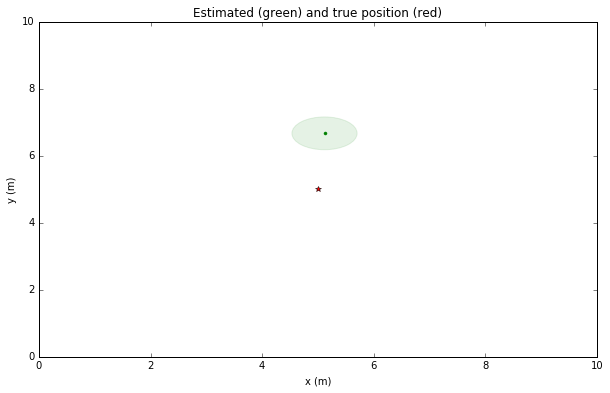

In [14]:
Pt,c,f = 0, 299792458, 2.4e9
xi, yi = array([[0, 0, 20, 20]]).T, array([[0, 20, 20, 0]]).T
sig = 1
Z = 3-1
x,y = 5,5

Si = Pt + 20 * log10(c/(4*pi*f) ) - 10 * log10( (x - xi)**2 + (y - yi)**2 + Z**2 ) + random.normal(0,1,xi.shape )
minimum = spmin( chi2_p, array([0, 0]) )
x0,y0 = minimum.x
print(minimum)

Bhat11 = sum( (-20 * (x0 - xi) / (log(10)*((x0-xi)**2 + (y0-yi)**2 + Z**2) ) )**2 )
Bhat22 = sum( (-20 * (y0 - yi) / (log(10)*((x0-xi)**2 + (y0-yi)**2 + Z**2) ) )**2 )
varx,vary = 1/Bhat11,1/Bhat22
stdx,stdy = sqrt(varx),sqrt(vary)

ax = gcf().gca()
ax.add_artist(Ellipse( xy=(x0, y0), width=stdx, height=stdy, color='g', alpha=0.1))
plot(x,y,'r*')
plot(x0,y0,'g.')
title('Estimated (green) and true position (red)')
xlabel('x (m)')
ylabel('y (m)')
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)



### x

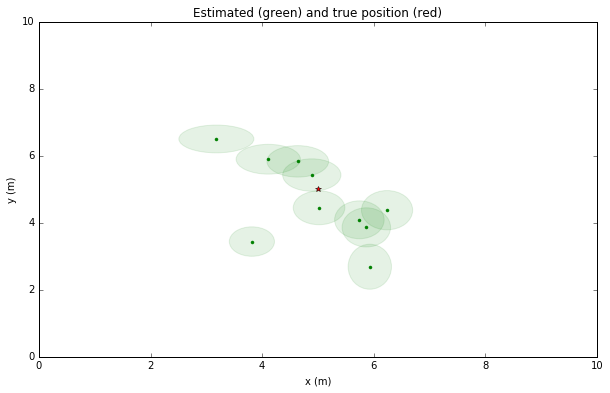

In [15]:
Pt,c,f = 0, 299792458, 2.4e9
xi, yi = array([[0, 0, 20, 20]]).T, array([[0, 20, 20, 0]]).T
sig = 1
Z = 3-1
x,y = 5,5

ax = gcf().gca()
plot(x,y,'r*')

for i in range(10):
    Si = Pt + 20 * log10(c/(4*pi*f) ) - 10 * log10( (x - xi)**2 + (y - yi)**2 + Z**2 ) + random.normal(0,1,xi.shape )
    minimum = spmin( chi2_p, array([0, 0]) )
    x0,y0 = minimum.x

    Bhat11 = sum( (-20 * (x0-xi) / (log(10)*((x0-xi)**2 + (y0-yi)**2 + Z**2) ) )**2 / sig**2 )
    Bhat22 = sum( (-20 * (y0-yi) / (log(10)*((x0-xi)**2 + (y0-yi)**2 + Z**2) ) )**2 / sig**2 )
    varx,vary = 1/Bhat11,1/Bhat22
    stdx,stdy = sqrt(varx),sqrt(vary)

    ax.add_artist(Ellipse( xy=(x0, y0), width=stdx, height=stdy, color='g', alpha=0.1))
    plot(x0,y0,'g.')

ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
title('Estimated (green) and true position (red)')
xlabel('x (m)')
ylabel('y (m)')

### y

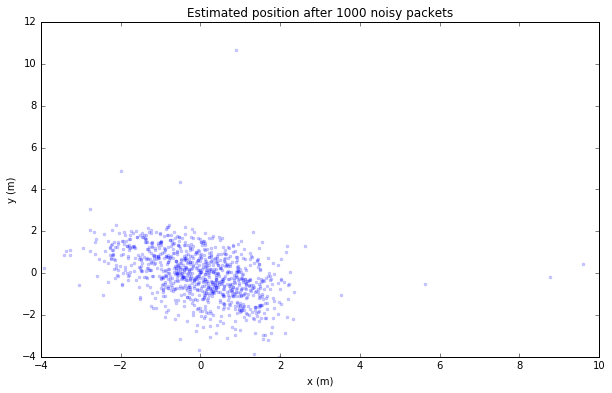

In [16]:
Pt,c,f = 0, 299792458, 2.4e9
xi, yi = array([[0, 0, 20, 20]]).T, array([[0, 20, 20, 0]]).T
sig = 1
Z = 3-1
x,y = 5,5

coords = zeros((2,1000))
for i in range(1000):
    Si = Pt + 20 * log10(c/(4*pi*f) ) - 10 * log10( (x - xi)**2 + (y - yi)**2 + Z**2 ) + random.normal(0,1,xi.shape )
    minimum = spmin( chi2_p, array([0, 0]) )
    #print(minimum)
    x0,y0 = minimum.x

    Bhat11 = sum( (-20 * (x0 - xi) / (log(10)*((x0-xi)**2 + (y0-yi)**2 + Z**2) ) )**2 )
    Bhat22 = sum( (-20 * (y0 - yi) / (log(10)*((x0-xi)**2 + (y0-yi)**2 + Z**2) ) )**2 )
    varx,vary = 1/Bhat11,1/Bhat22
    #print(varx,vary)
    stdx,stdy = sqrt(varx),sqrt(vary)
    #print((x-x0)/stdx,(y-y0)/stdy)
    coords[:,i] = (x-x0)/stdx,(y-y0)/stdy
plot(coords[0],coords[1],'.',alpha=0.2)
title('Estimated position after 1000 noisy packets')
xlabel('x (m)')
ylabel('y (m)')

As seen in this figure, the mean of the points is about (0,0) and it looks like ~68% lies within a radius of 2. If the pull distribution would be different, it could mean our model is not a correct representation for the data. An example: we assumed with the Friis equation that there are no objects between the sender and receiver, which might not be the case. Or in our case, the estimated error is not a gaussian with $\sigma=2$.

### Z
This would mean our pull distribution would give an error of $2^2=4$ times as large.

### Bonus:
The ellipse could be rotated, as the axes of a two dimensional plane are arbitrary. This could be acieved by an Singular Value Decomposition. However, the ellipse can never be skewed, because a two dimensional plane always has ortogonal axes. The x and y location are independent of each other.

## 0.6

there are 38 packets
with a resolution of (0.501480,0.400733)


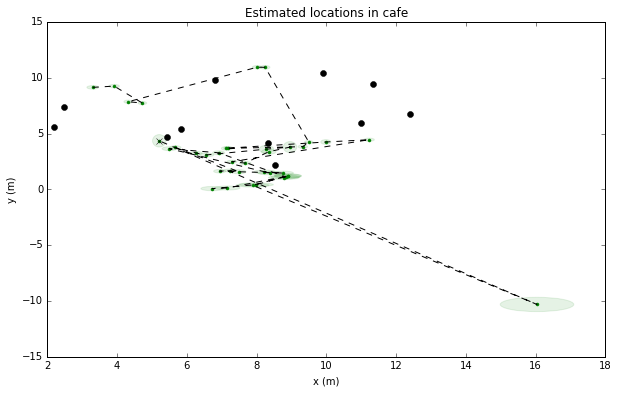

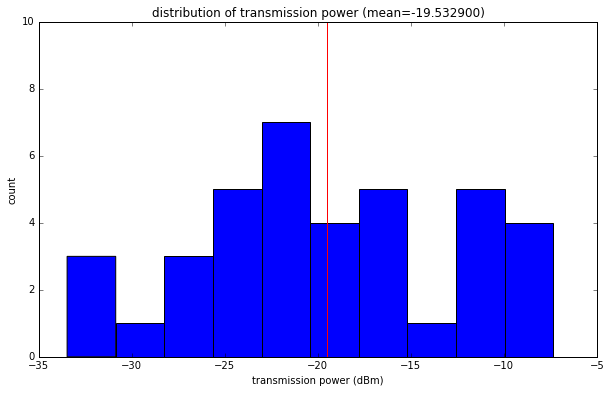

In [17]:
ROUTERS = {'Lima':(5.82,5.45,0),'Mike':(11.33,9.43,1),'Kilo':(12.39,6.77,2),'Oscar':(2.48,7.36,3),
           'Alpha':(8.53,2.16,4),'India':(2.18,5.61,5),'November':(8.34,4.13,6),'Hotel':(5.43,4.71,7),
           'Romeo':(10.99,5.94,8),'Quebec':(6.82,9.78,9),'Papa':(9.9,10.39,10)}

def plot_routers(ax=gcf().gca()):
    """Plot coordinates of router as black circles.
    uses gcf if no ax is given
    """
    for coords in ROUTERS.values():
        ax.plot(coords[0],coords[1],'ko')

def plot_pos(positions,colour='g',ax=gcf().gca(),path=False):
    """Plot estimated positions with error ellipses.
    assumes positions is a 2D array with (x,y,stdx,stdy,time) at each row
    uses gcf if no ax is given
    uses green if no colour is given
    if path is true, also plots a black path between consequetive points in time
    """
    for x0,y0,stdx,stdy,Ti in positions:
        ax.add_artist(Ellipse( xy=(x0, y0), width=stdx, height=stdy, color=colour, alpha=0.1))
        ax.plot(x0,y0,colour+'.')
    if path:
        timed_data = array(sorted(positions,key=lambda e:e[4]))
        ax.plot(timed_data[:,0],timed_data[:,1],'k--')
        ax.plot(timed_data[-1,0],timed_data[-1,1],'kx')

def chi2_2(x,p):
    """Computes chi2 with given parameters.
    x = [x,y,Pt]
    p = [Si,sig,xi,yi,c,f,Z]
    """
    return sum( (p[0] - (x[2] + 20 * log10(p[4]/(4*pi*p[5]) ) - 
                    10 * log10( (x[0] - p[2])**2 + (x[1] - p[3])**2 + p[6]**2 ))
                )**2/p[1]**2, axis=0 )

def ferr(x0,y0,xi,yi,Z):
    """Calculate the error of given data.
    returns stdx and stdy
    (see 0.5 for formulae)
    """
    Bhat11 = sum( (-20 * (x0 - xi) / (log(10)*((x0-xi)**2 + (y0-yi)**2 + Z**2) ) )**2 )
    Bhat22 = sum( (-20 * (y0 - yi) / (log(10)*((x0-xi)**2 + (y0-yi)**2 + Z**2) ) )**2 )
    varx,vary = 1/Bhat11,1/Bhat22
    return sqrt(varx),sqrt(vary)
    
def split_list_at_delta_time(times,packets,eps=1000,verbatim=False):
    """Given a list of sorted time, split packets if delta above eps
    Compute delta-time and splits the packets when this is above eps (default=1000ms). 
    If verbatim is true, also plots the time and dtime
    """
    assert len(times) == len(packets)
    assert len(times) > 1
    delta_times = abs( array(times[:-1])-array(times[1:]) )
    thresh = delta_times > eps
    new_packets = []
    low_bound,up_bound = -1,0
    for i in range(1,len(thresh)):
        if thresh[i-1] == 1:
            low_bound,up_bound=up_bound,i
            new_packets.append(packets[low_bound:up_bound])
    new_packets.append(packets[up_bound:])
    
    if verbatim:
        figure()
        subplot(2,1,1), plot(times)
        title('time of received packet')
        ylabel('time (ms since epoch)'),xlabel('packet')
        subplot(2,1,2), semilogy(delta_times), semilogy([0,len(delta_times)],[eps,eps],'r:')
        title('logarithmic delta of above, showing eps in red')
        ylabel('delta time (ms)'),xlabel('packet')
        tight_layout()
    return new_packets

def step_a(filename='UvA-wifitracking-exercise-prepped-data.csv',eps=1000):
    """Read data and split packets. 
    Read data, cluster packets with same ID. Afterwards split these
    clusters if time between recievers is above eps (default 1000ms).
    Also eliminates all packets that weren't received by more than 2 routers,
    as triangulation would be impossible.
    returns good_packets as list of packets. Each packet is a list with 
    (RouterName,signal_strength,time) tuples
    """
    f = open(filename,'r')
    f.readline()
    data = [line.split(',') for line in f]
    f.close
    packets = {}
    for row in data:
        key = tuple(row[0:4])
        old = packets.get(key,[])
        old.append((row[6],int(row[7]),int(row[5])))
        packets[key] = old
    good_packets = []
    for idx,packet in packets.items():
        if len(packet) > 2:
            packet.sort(key=lambda e:e[2])
            times = [rec[2] for rec in packet]
            new_packets = split_list_at_delta_time(times,packet,eps)
            good_packets += [p for p in new_packets if len(p) > 2]
    return good_packets


def step_b(packets):
    """Estimates position and error for each location.
    Loops over all packets and uses scipy.minimize to find
    the best estimate for the friis.
    returns positions as 2D array with (x,y,stdx,stdy,time) at each row
    and sent signal strenght as a seperate 1D array.
    """
    positions = []
    Pt = []
    for i,packet in enumerate(packets):

        xi,yi,Si,Ti = empty(len(packet)),empty(len(packet)),empty(len(packet)),empty(len(packet))
        for j,rec in enumerate(packet):
            xi[j],yi[j],Si[j],Ti[j] = ROUTERS[rec[0]][0],ROUTERS[rec[0]][1],rec[1],rec[2]

        param = [ Si, 1, xi, yi, 299792458, 2.4e9, 2]
        minimum = spmin( chi2_2, array([0, 0, 0]), param )
        
        x0,y0 = minimum.x[:2]
        stdx,stdy = ferr(x0,y0,xi,yi,2)
        
        positions.append( (x0,y0,stdx,stdy,min(Ti)) )
        Pt.append(minimum.x[2])
    return array(positions),array(Pt)


def main():
    """Runs step a-f of part 6."""
    packets = step_a()
    print('there are %d packets'%len(packets))
    positions,Pt = step_b(packets) ## and step c
    ## step d
    plot_routers()
    plot_pos(positions,path=True)
    title('Estimated locations in cafe')
    xlabel('x (m)'),ylabel('y (m)')
    ## step e
    print('with a resolution of (%f,%f)'%tuple(mean(positions,axis=0)[2:4]) )
    ## step f
    mPt = mean(Pt)
    figure(),hist(Pt),plot([mPt,mPt],[0,10],'-r'),
    title('distribution of transmission power (mean=%f)'%(mPt))
    xlabel('transmission power (dBm)')
    ylabel('count')

main()

there are 20 clustered packets
with a resolution of (0.386450,0.282037)


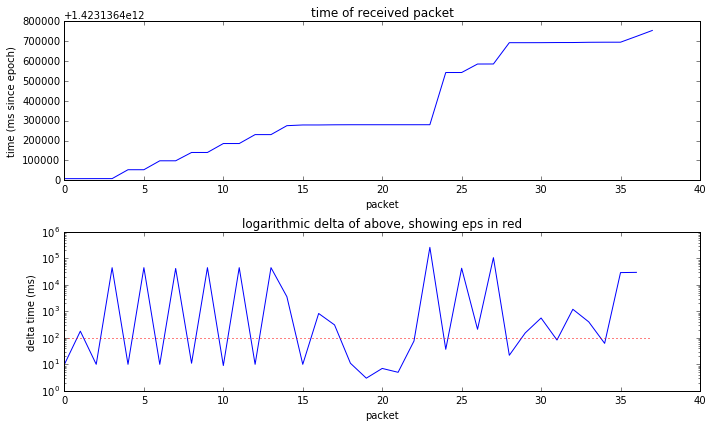

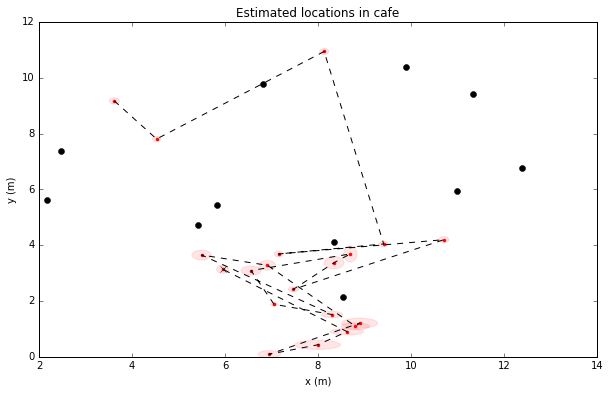

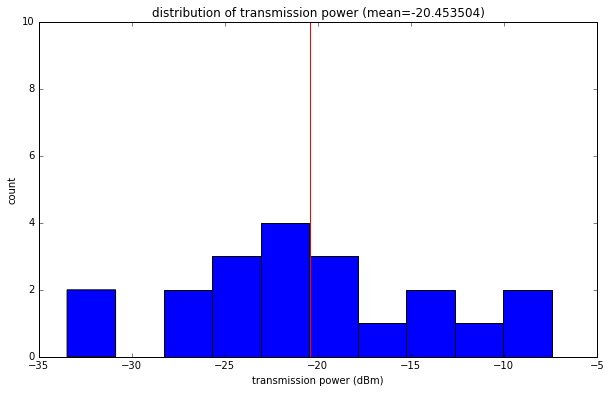

In [18]:
def step_g(packets,eps=100,verbatim=False):
    """Clusters packets if time between is below eps.
    Sort packets by first received time, uses split_list_at_delta_time()
    to split this into clusters of packets that are closer than eps (default
    100ms) in time.
    Returns a new list of packets (same structure as step_a()) of these
    clusters.
    """
    min_times = [min([rec[2] for rec in packet]) for packet in packets]
    timed_data = sorted(zip(min_times,packets))
    timed_times = array([e[0] for e in timed_data])
    clusters= split_list_at_delta_time(timed_times,timed_data,eps,verbatim)
    new_packets = []
    for cluster in clusters:
        new_packet = []
        for time,rec in cluster:
            new_packet += rec
        new_packets.append(new_packet)
    return new_packets

def main_now_with_clusters():
    """Runs step g-h of part 6."""
    packets = step_a()
    packets2 = step_g(packets,100,True)
    pos2,Pt2 = step_b(packets2)
    fig = figure()
    ax = fig.add_subplot(111)
    print('there are %d clustered packets'%len(packets2))
    plot_routers(ax=ax)
    plot_pos(pos2,colour='r',ax=ax,path=True)
    title('Estimated locations in cafe')
    xlabel('x (m)'),ylabel('y (m)')
    print('with a resolution of (%f,%f)'%tuple(mean(pos2,axis=0)[2:4]) )
    mPt = mean(Pt2)
    figure(),hist(Pt2),plot([mPt,mPt],[0,10],'-r'),
    title('distribution of transmission power (mean=%f)'%(mPt))
    xlabel('transmission power (dBm)')
    ylabel('count')

main_now_with_clusters()

The results show a nice path through the cafe. In the first (green) estimation we made an assumption that if a packet with the same seqNr had a difference in time of more than a second, it has to be a different packet. As we assume that all routers are faster than one second to process the data.

The second (red) estimation assumes that if packets are closer together in time than 0.1 seconds, the user probably didn't move at all, and therefore we could cluster them. This shows a less noisy path. We can also see from the figure of logarithmic delta-time that having a threshold of one second instead of 0.1, even more packets would cluster together. However, we assume that a person can move a significant distance in this time, and therefore made the threshold lower.

In both cases the transmission power is acceptable, as it is between 0 and the received power at the routers.